# Evaluation metric

# Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn import metrics

# Load dataset

In [7]:
dataobj = load_breast_cancer()

X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
y = dataobj.target

df = X
df['target'] = y

In [8]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [10]:
## class distribution
df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

# Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

# Make Pipeline

In [12]:
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = SVC(random_state=1)

pipe = Pipeline([
    ('scl', scl),
    ('pca', pca),
    ('clf', clf)
])

pipe

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('clf', SVC(random_state=1))])

# Grid Search cross validation

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
pipe.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('pca', PCA(n_components=0.9)),
  ('clf', SVC(random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'pca': PCA(n_components=0.9),
 'clf': SVC(random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.9,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'clf__C': 1.0,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'scale',
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': 1,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [16]:
param_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

set1 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['linear']
}

set2 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['rbf']
}

set3 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['poly']
}
param_grid = [set1, set2, set3]

In [20]:
gs = GridSearchCV(
    estimator=pipe,
    scoring='f1',
    param_grid=param_grid,
    cv=10,
    n_jobs=-1
)
gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']}],
             scoring='f1')

In [21]:
## fitting model
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']}],
             scoring='f1')

In [22]:
## refiting model
gs.refit

True

In [23]:
## preding
y_pred = gs.predict(X_test)

# Evaluation metric

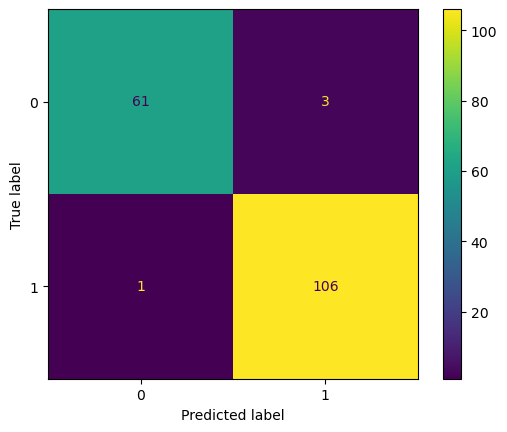

In [41]:
# confusion metrix
## label = ['Positve', 'Negative']
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]) #labels=['malignant', 'benign'])
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot();

In [46]:
## Accuracy
print(f'Accuracy = {metrics.accuracy_score(y_test, y_pred)}')

## Precision
print(f'Pecision = {metrics.precision_score(y_test, y_pred)}')

## Recall
print(f'Recall = {metrics.recall_score(y_test, y_pred)}')

## F1 score
print(f'F1 = {metrics.f1_score(y_test, y_pred)}')

Accuracy = 0.9766081871345029
Pecision = 0.9724770642201835
Recall = 0.9906542056074766
F1 = 0.9814814814814815
